DELIVERABLES

Requirements:

Well-articulated problem statement with "specific aim" and hypothesis, based on your lightning talk
An outline of any potential methods and models
Detailed explanation of data available
Describe any outstanding questions, assumptions, risks, caveats
Define your goals and criteria, explain what success looks like
Demonstrate domain knowledge, including features or benchmarks from similar projects
A well organized iPython notebook with code and output
At least one visual for each independent variable (and any relationships) using a python visualization tool
Provide insight about data set and its impact on your hypothesis
Bonus:

Consider alternative hypotheses: if your project is a regression problem, is it possible to rewrite it as a classification problem?
"Convert" your goal metric from a statistical one (like Mean Squared Error) and tie it to something non-data people can understand, like a cost/benefit analysis, etc.
Surface and share your analysis online. Jupyter makes this very simple and the setup should not take long.
Try experimenting with other visualization languages; python/pandas-highcharts, shiny/r, or for a real challenge, d3 on its own. Interactive data analysis opens the doors for others to easily interpret your work and explore the data themselves!

# Problem Statement


Unplanned hospital re-admissions are common, expensive and often unpreventable in the community.

Public hospitals which are funded by tax-payers money have an obligation to the state to demonstrate use of funds and as hospital readmissions are costly, there is pressure to prevent them. Various research studies and modelling has been performed, as well as risk prediction scores. The factors that predispose a patient for unplanned readmission (definitions of which vary from between 14 to 30 days from index admission to the subsequent one) include age, socio-economic status, previous emergency department admissions, severity of illness (as scored by different metrics), or the presence of selected chronic diseases such as heart failure, or chronic obstructive lung disease. 

Measures of functional independence, i.e. the ability of a patient to perform activities of daily living, have not been studied in these models. 

This project aims to create a model which may be able to predict a patient's likelihood of being readmitted shortly after an index hospital stay, by exploring the effect of various contributing factors such as patient age, gender, BMI, functional status, diagnoses and risk of falls. 

There is also an external pressure on hospitals to keep average length of hospital stays within 5 days. This project will also attempt to investigate if there is any effect on index hospital length of stays being less than 5 days, and subsequent readmission for a related problem. 

We will be using logistic regression to model our main hypothesis, and clustering methods/classification to explore secondary hypotheses that may arise during the course of analyzing the data. 

## Hypothesis

Null hypothesis, $H_0$: There is no relationship between age, gender, BMI, functional status, diagnoses, risk of falls and readmission. 

Alternative hypothesis, $H_1$: Being of a higher age, lower BMI, poorer functional status, higher risk of falls will result in a readmission.

### What is your dataset about? 

This dataset provides information about patients admitted to a public hospital in Singapore between July 2015 to July 2017. The variables are explained in the data dictionary below. 

#### Data Dictionary

Variable |	Definition	| Key | Type of Variable
--- | ----| --- | ---
Gender|Gender|Male, Female|nominal
Race|Race|Chinese,Malay,Indian,Others|nominal
DOB|Date of Birth |Date|continuous
Postcode|Postal Code of patient's address|Number|categorical
first_BMI|BMI as per initial admission|kg/m2|continuous
next_BMI|BMI as per subsequent admission|kg/m2|continuous
Marital_Status|Marital Status|-|categorical
Religion|Religion|-|nominal
CSN|Encounter number|-|nominal
Days_between|Number of Days in between initial hospital admission and the next admission|Days| continuous
Admission_Date/Time|Admission Date/Time|Date|continuous
Discharge_Date/Time|Discharge Date/Time|Date|continuous
Admission_Specialty|Medical discipline overseeing the patient|Specialty| nominal
LOS|Length of Stay in Hospital|Days|continuous
Age|Age on Admission|Years|continuous
Discharge_Disposition|Discharge Location|-|nominal
Death_Date|Date of death. NULL if patient alive|Date|continuous
Readmission_encounter|Encounter number of the readmission|-|nominal
Readmitted|Y = Readmitted, N = not readmitted|-|binary
Readmission_Date/Time|Readmission Date/Time|Date|continuous
Readmission_Specialty|Medical discipline overseeing the patient|Specialty|nominal
Readmission_class|Inpatient/Outpatient class|-|categorical
Readmission_LOS|Readmission Length of Stay in Hospital|Days|continuous
Readmission_Discharge_Disposition|Discharge Location|-|nominal	
Readmission_Primary_Diagnosis|Primary Diagnosis|Main Medical Condition|nominal	
Readmission_Secondary_Diagnosis|Secondary Diagnosis|Medical Condition|nominal
AdmFalls_risk_score1|Falls Risk Score on Admission upon initial admission|Score|continuous
DischFalls_risk_score1|Falls Risk Score on Discharge upon initial admission|Score|continuous
AdmFalls_risk_score2|Falls Risk Score on Admission upon readmission|Score|continuous
DischFalls_risk_score2|Falls Risk Score on Discharge upon readmission|Score|continuous	
firstadmitMBI|Modified Barthel Index on Admission of initial admission| (give range here)|continuous	
firstdischMBI|Modified Barthel Index on Discharge of initial admission| (give range here) |continuous
nextadmitMBI|Modified Barthel Index on Admission of readmission| (give range here)|continuous	
nextdischMBI|Modified Barthel Index on Discharge of readmission| (give range here) |continuous
firstadmitFIM|Functional Independence Measure on Admission of initial admission| (give range here)|continuous	
firstdischFIM|Functional Independence Measure on Discharge of initial admission| (give range here) |continuous
nextadmitFIM|Functional Independence Measure on Admission of readmission| (give range here)|continuous	
nextdischFIM|Functional Independence Measure on Discharge of readmission| (give range here) |continuous

## Goals and Criteria

The goal would be to acertain the influence of the abovementioned variables on the likelihood of a patient needing to be readmitted, and with this knowledge, to be able to prevent unplanned readmissions. 

Success would be measured in the future, where readmission rates would be lower than current rates. 

## Feature Exploration

In [175]:
%matplotlib inline

# for seaborn issue:
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import statsmodels as sm
import statsmodels.api as sm
import statsmodels.formula.api as smf
import numpy as np
from scipy import stats
import json
import sklearn as sk
import itertools
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import seaborn as sns
from statsmodels.graphics.mosaicplot import mosaic
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import Perceptron
from sklearn.metrics import roc_curve, roc_auc_score, accuracy_score, auc, confusion_matrix, recall_score, precision_score
from sklearn import tree
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import VotingClassifier
from sklearn import svm, preprocessing
from sklearn.model_selection import KFold
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
#from sklearn import export_graphviz
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering
from sklearn import metrics, model_selection
from sklearn.ensemble import RandomForestClassifier
from collections import Counter
from os import system
from sklearn.tree import DecisionTreeClassifier, export_graphviz

sns.set(style='white', context='notebook', palette='deep')
plt.style.use("seaborn-pastel")

In [176]:
readmit = pd.read_csv("/Users/Administrator/Desktop/Readmissions.csv")
readmit.head()

,Gender,Race,DOB,Postcode,first_BMI,next_BMI,Marital_Status,Religion,CSN,Days_between,...,AdmFalls_risk_score2,DischFalls_risk_score2,firstadmitMBI,firstdischMBI,nextadmitMBI,nextdischMBI,firstadmitFIM,firstdischFIM,nextadmitFIM,nextdischFIM
0,Female,Chinese,20/4/1936,760709.0,NaN,NaN,NaN,NaN,5498370,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Male,Chinese,14/2/1967,728682.0,NaN,NaN,NaN,NaN,4673442,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Male,Chinese,18/1/1963,469267.0,NaN,NaN,Unknown,NaN,4749986,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Female,Chinese,22/3/1962,762426.0,NaN,NaN,NaN,NaN,3874474,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Female,Chinese,28/3/1942,650108.0,18.05,NaN,NaN,NaN,3648971,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [177]:
readmit.describe()

,Postcode,first_BMI,next_BMI,CSN,Days_between,LOS,LOS_inpatient,Age,Readmission_encounter,Readmission_LOS,...,AdmFalls_risk_score2,DischFalls_risk_score2,firstadmitMBI,firstdischMBI,nextadmitMBI,nextdischMBI,firstadmitFIM,firstdischFIM,nextadmitFIM,nextdischFIM
count,1.574980e+05,63419.000000,16845.000000,1.575420e+05,37080.000000,157542.000000,157542.000000,150680.000000,3.708000e+04,37080.000000,...,27536.000000,27529.000000,21883.000000,21877.000000,7147.000000,7137.000000,393.000000,392.000000,52.000000,52.000000
mean,5.844172e+05,24.716026,24.112564,5.231107e+06,11.608145,3.581597,3.586402,58.713771,5.297382e+06,5.162648,...,34.810248,34.787678,42.293698,48.017416,39.434028,47.479333,89.620865,100.323980,88.730769,101.365385
std,1.687859e+05,28.208351,22.008017,9.588582e+05,9.234862,6.986348,7.075922,19.071317,9.390019e+05,9.442372,...,23.668488,22.004113,28.517324,30.193448,27.058885,30.569838,26.606952,26.112772,24.925863,25.626295
min,0.000000e+00,6.040000,7.610000,4.391900e+04,-1.000000,1.000000,1.000000,12.000000,4.391900e+04,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,18.000000,18.000000,24.000000,27.000000
25%,6.003120e+05,20.660000,20.070000,4.433881e+06,3.000000,1.000000,1.000000,46.000000,4.525172e+06,1.000000,...,15.000000,15.000000,17.000000,20.000000,16.000000,20.000000,73.000000,91.750000,77.750000,93.750000
50%,6.408380e+05,23.710000,23.310000,5.226934e+06,10.000000,1.000000,1.000000,61.000000,5.317878e+06,2.000000,...,35.000000,35.000000,39.000000,46.000000,36.000000,45.000000,97.000000,111.000000,96.000000,113.000000
75%,6.701840e+05,27.180000,26.770000,6.016408e+06,19.000000,3.000000,3.000000,73.000000,6.066004e+06,5.000000,...,50.000000,50.000000,65.000000,75.000000,62.000000,75.000000,109.000000,120.000000,105.500000,118.000000
max,9.691180e+06,3085.940000,1936.330000,6.953556e+06,69.000000,255.000000,356.000000,111.000000,6.952743e+06,179.000000,...,125.000000,125.000000,105.000000,105.000000,105.000000,105.000000,126.000000,126.000000,126.000000,126.000000


In [178]:
readmit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 157542 entries, 0 to 157541
Data columns (total 39 columns):
Gender                               157542 non-null object
Race                                 157469 non-null object
DOB                                  157542 non-null object
Postcode                             157498 non-null float64
first_BMI                            63419 non-null float64
next_BMI                             16845 non-null float64
Marital_Status                       86223 non-null object
Religion                             50121 non-null object
CSN                                  157542 non-null int64
Days_between                         37080 non-null float64
Admission_Date/Time                  157542 non-null object
Discharge_Date/Time                  157542 non-null object
Admission_Specialty                  156665 non-null object
LOS                                  157542 non-null int64
LOS_inpatient                        157542 non-null

In [179]:
readmit.corr()

,Postcode,first_BMI,next_BMI,CSN,Days_between,LOS,LOS_inpatient,Age,Readmission_encounter,Readmission_LOS,...,AdmFalls_risk_score2,DischFalls_risk_score2,firstadmitMBI,firstdischMBI,nextadmitMBI,nextdischMBI,firstadmitFIM,firstdischFIM,nextadmitFIM,nextdischFIM
Postcode,1.000000,0.012971,0.007386,0.046907,0.004267,-0.023821,-0.023297,-0.083686,0.049242,0.006457,...,0.016622,0.008205,0.040020,0.013238,0.032036,0.019951,-0.056274,-0.032244,0.004104,0.023217
first_BMI,0.012971,1.000000,0.939093,-0.009747,-0.002191,-0.029517,-0.029637,-0.058069,-0.018635,-0.020699,...,-0.046437,-0.052041,0.058965,0.051985,0.084297,0.089928,0.140890,0.131995,0.049854,0.103021
next_BMI,0.007386,0.939093,1.000000,-0.013526,0.033772,-0.028731,-0.028737,-0.072074,-0.014573,-0.043039,...,-0.035263,-0.033869,0.111731,0.105930,0.073024,0.058460,0.270400,0.268845,0.107248,0.000848
CSN,0.046907,-0.009747,-0.013526,1.000000,-0.014462,-0.015819,-0.016224,-0.006086,0.995073,-0.021812,...,0.071927,0.052761,0.043519,0.065268,0.049813,0.078606,-0.102177,-0.087076,0.020852,-0.025476
Days_between,0.004267,-0.002191,0.033772,-0.014462,1.000000,-0.048432,-0.048430,-0.043306,0.027200,-0.148012,...,-0.025308,-0.036064,0.095466,0.095727,0.063832,-0.050922,0.224702,0.281868,-0.212435,-0.266609
LOS,-0.023821,-0.029517,-0.028731,-0.015819,-0.048432,1.000000,0.987195,0.197891,0.001275,0.301475,...,0.226239,0.207912,-0.233383,-0.112360,-0.135784,-0.110209,-0.507262,-0.456770,-0.221749,-0.185809
LOS_inpatient,-0.023297,-0.029637,-0.028737,-0.016224,-0.048430,0.987195,1.000000,0.195133,0.001263,0.301410,...,0.226224,0.207898,-0.233388,-0.112361,-0.135863,-0.110204,-0.507262,-0.456770,-0.221749,-0.185809
Age,-0.083686,-0.058069,-0.072074,-0.006086,-0.043306,0.197891,0.195133,1.000000,-0.008028,0.197314,...,0.392666,0.382898,-0.227361,-0.251678,-0.183208,-0.210523,-0.212011,-0.270980,-0.178188,-0.274152
Readmission_encounter,0.049242,-0.018635,-0.014573,0.995073,0.027200,0.001275,0.001263,-0.008028,1.000000,-0.012572,...,0.095659,0.071121,0.033708,0.052994,0.045409,0.069631,-0.234030,-0.197503,-0.006693,-0.052212
Readmission_LOS,0.006457,-0.020699,-0.043039,-0.021812,-0.148012,0.301475,0.301410,0.197314,-0.012572,1.000000,...,0.259256,0.241406,-0.141610,-0.155857,-0.209835,-0.047461,-0.516100,-0.533948,-0.606139,-0.397692


## Visualizations

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x116a59bd0>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x12298f350>]], dtype=object)

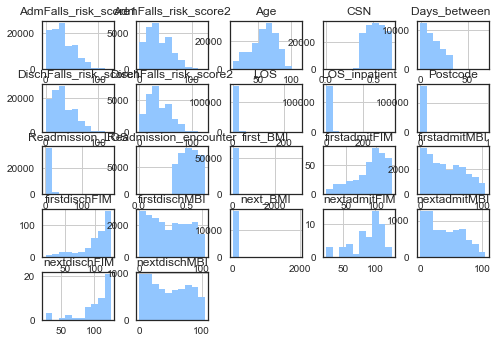

In [122]:
readmit.hist()

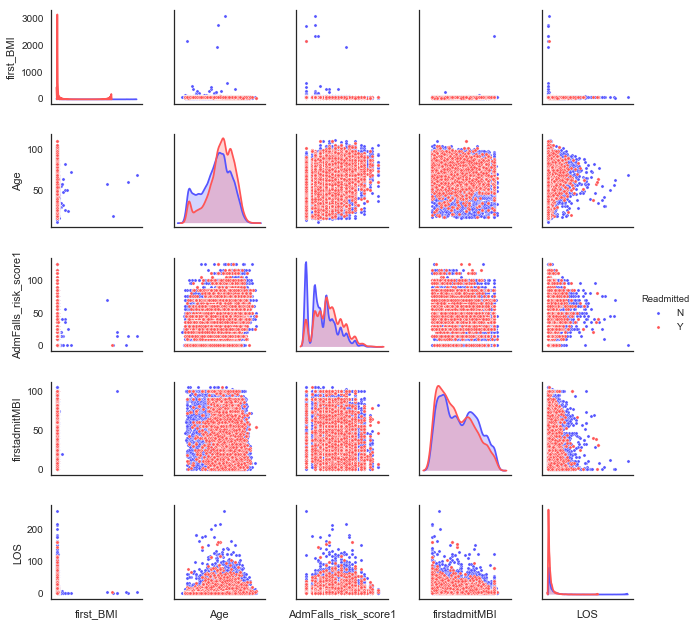

In [174]:
g = sns.pairplot(readmit[[u'Readmitted',u'Discharge_Disposition', u'first_BMI', u'Gender', u'Age', u'AdmFalls_risk_score1', u'firstadmitMBI',u'LOS']], hue='Readmitted', palette = 'seismic',size=1.8,diag_kind = 'kde',diag_kws=dict(shade=True),plot_kws=dict(s=10))
g.set(xticklabels=[])


### Takeaway from the plots

It appears that there may be relationships between a lower age and readmissions, low BMI and readmissions, lower functional scores and higher risk of falls and readmissions. 

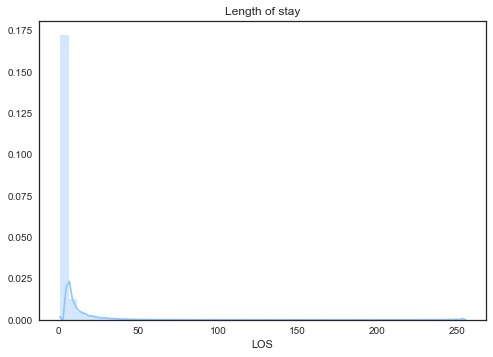

In [89]:
sns.distplot(readmit["LOS"]);
plt.title("Length of stay");

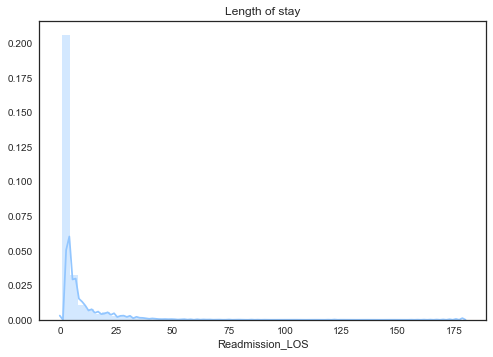

In [90]:
sns.distplot(readmit["Readmission_LOS"].dropna());
plt.title("Length of stay");

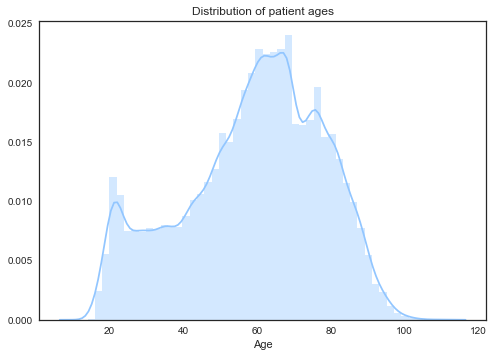

In [91]:
sns.distplot(readmit["Age"].dropna());
plt.title("Distribution of patient ages");

In [92]:
print plt.style.available

[u'seaborn-darkgrid', u'seaborn-notebook', u'classic', u'seaborn-ticks', u'grayscale', u'bmh', u'seaborn-talk', u'dark_background', u'ggplot', u'fivethirtyeight', u'_classic_test', u'seaborn-colorblind', u'seaborn-deep', u'seaborn-whitegrid', u'seaborn-bright', u'seaborn-poster', u'seaborn-muted', u'seaborn-paper', u'seaborn-white', u'seaborn-pastel', u'seaborn-dark', u'seaborn', u'seaborn-dark-palette']


In [93]:
#sns.swarmplot(x="Gender", y="Age on Admission", data=readmit);
#plt.title('Patients grouped by age and sex');
#plt.yticks(np.arange(0,100,10));

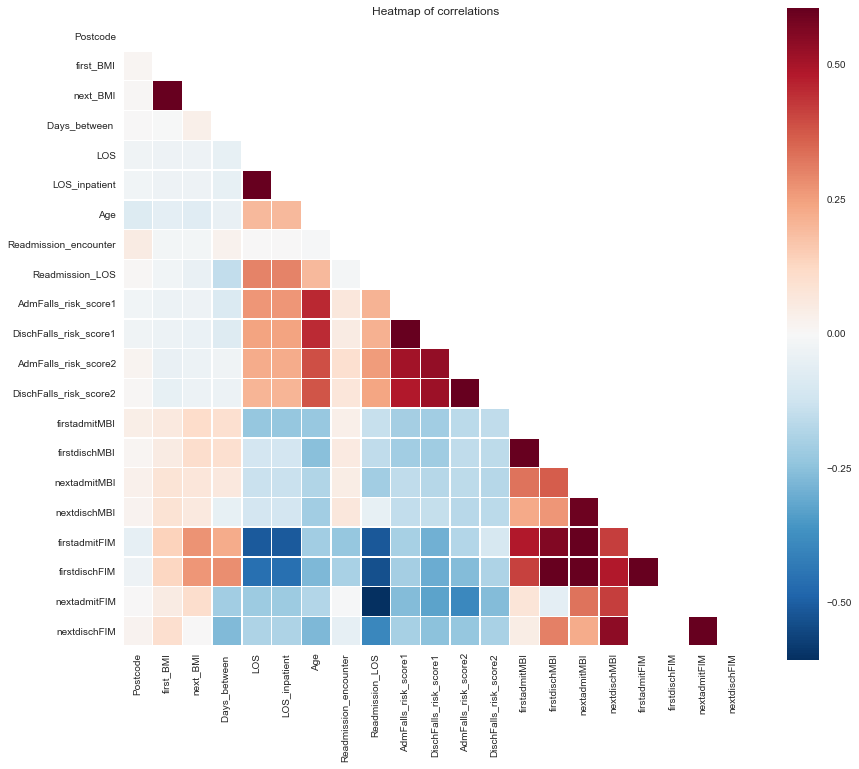

In [137]:
# Generate a mask for the upper triangle
mask = np.zeros_like(readmit.drop('CSN',axis=1).corr(), dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
plt.figure(figsize=(14,12))
sns.heatmap(readmit.drop('CSN',axis=1).corr(),vmax=0.6,square=True, annot=False, mask=mask, cmap="RdBu_r",linewidths=.5);
plt.title("Heatmap of correlations");

It appears that there is a positive correlation between hospital length of stay and risk of falls and age, and a negative correlation between hospital length of stay and higher scores of physical function. Readmission also appears to have similar patterns of correlation as hospital length of stay. 

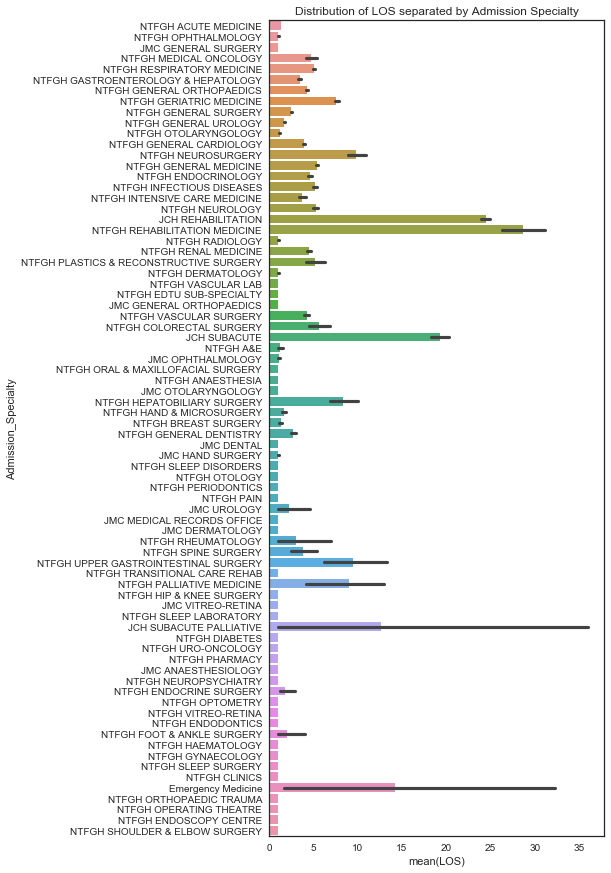

In [95]:
f, ax = plt.subplots(figsize=(6, 15))
#admitspecs = sns.load_dataset("readmit").sort_values("LOS", ascending=False)
sns.barplot(y="Admission_Specialty", x="LOS", data=readmit);
plt.title("Distribution of LOS separated by Admission Specialty");

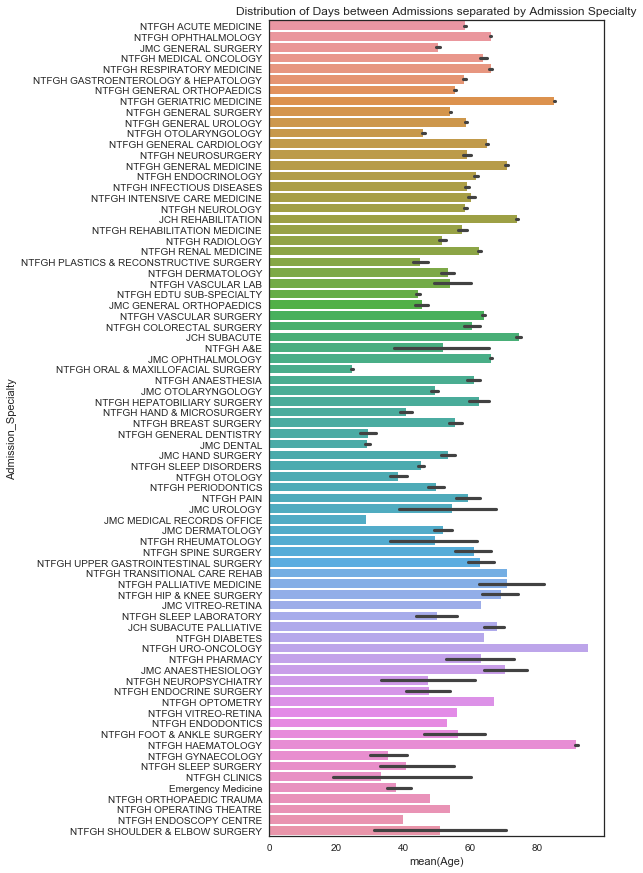

In [96]:
f, ax = plt.subplots(figsize=(6, 15))
#admitspecs = sns.load_dataset("readmit").sort_values("LOS", ascending=False)
sns.barplot(y="Admission_Specialty", x="Age", data=readmit);
plt.title("Distribution of Days between Admissions separated by Admission Specialty");

In [97]:
#f, ax = plt.subplots(figsize=(6, 15))
#admitspecs = sns.load_dataset("readmit").sort_values("LOS", ascending=False)
#sns.barplot(y="Readmission_Specialty", x="Days_between", data=readmit);
#plt.title("Distribution of Days between Admissions separated by Readmission Specialty");

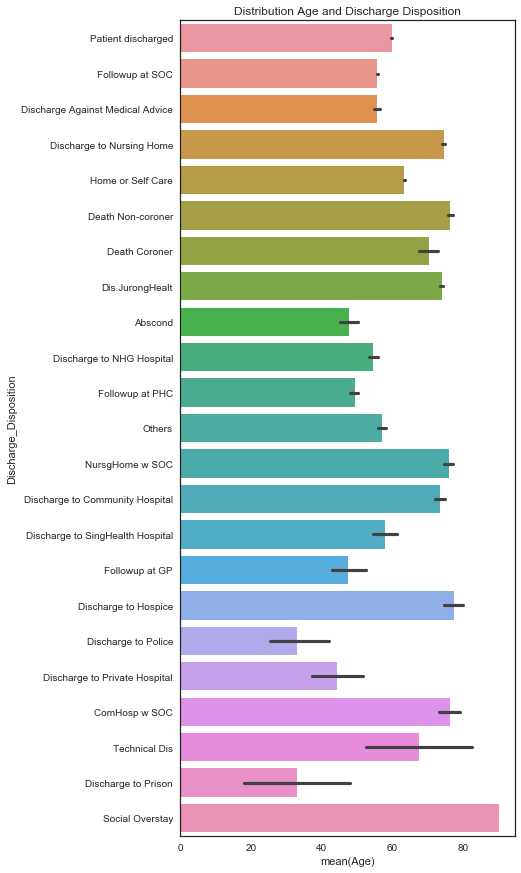

In [98]:
f, ax = plt.subplots(figsize=(6, 15))
#admitspecs = sns.load_dataset("readmit").sort_values("LOS", ascending=False)
sns.barplot(x="Age", y="Discharge_Disposition", data=readmit);
plt.title("Distribution Age and Discharge Disposition");

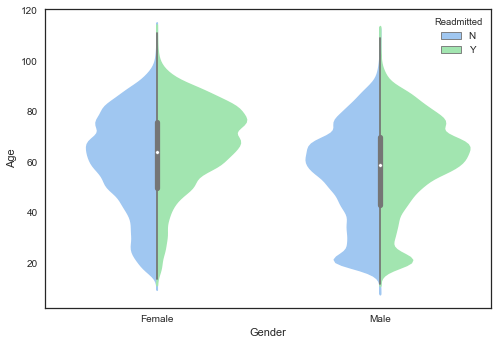

In [140]:
sns.violinplot(x="Gender", y="Age", hue="Readmitted", data=readmit, split=True)
#plt.hlines([0,10], xmin=-1, xmax=3, linestyles="dotted")

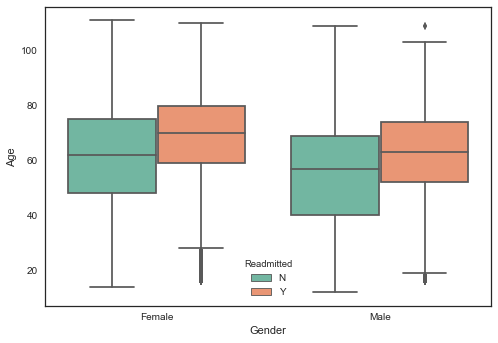

In [145]:
ax = sns.boxplot(x="Gender", y="Age", hue="Readmitted",
...                  data=readmit, palette="Set2")

It appears that there may be a trend towards older patients, regardless of gender, and the likelihood of readmission. 

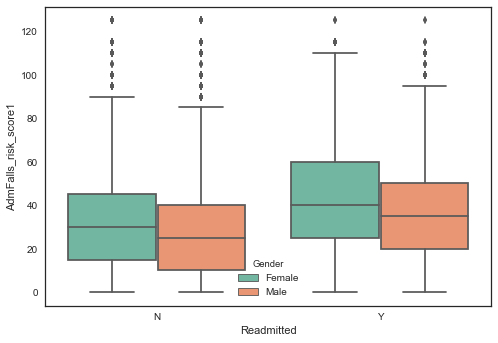

In [150]:
ax = sns.boxplot(x="Readmitted", y="AdmFalls_risk_score1", hue="Gender",
...                  data=readmit, palette="Set2")

There may be a relationship between females and risk of falls, and readmission. 

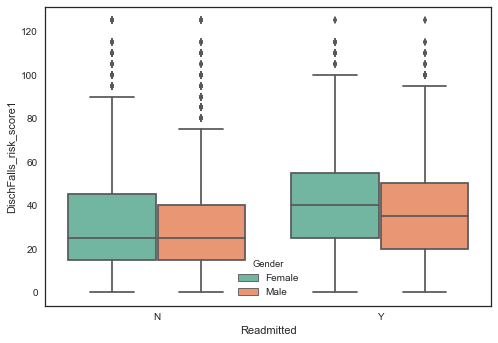

In [158]:
ax = sns.boxplot(x="Readmitted", y="DischFalls_risk_score1", hue="Gender",
...                  data=readmit, palette="Set2")

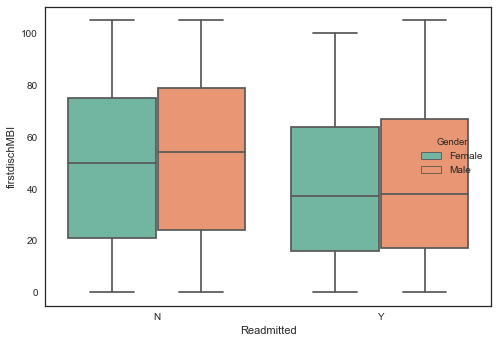

In [154]:
ax = sns.boxplot(x="Readmitted", y="firstdischMBI", hue="Gender",
...                  data=readmit, palette="Set2")

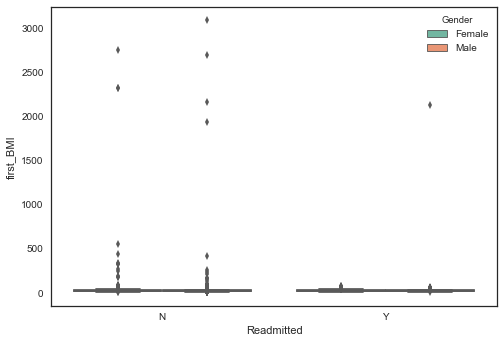

In [155]:
ax = sns.boxplot(x="Readmitted", y="first_BMI", hue="Gender",
...                  data=readmit, palette="Set2")

We may need to categorize BMI into 'under weight', 'ideal weight' and 'over weight' etc. 

## In Summary

There is definitely a value in including functional measures in the modelling of readmission risk indicators. 

For the next part of the project, dummy variables will be created for: 

1. BMI
2. MBI scores - into low function, normal function

And we will proceed with the various machine learning models as suggested earlier. 